In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
root = "/content/drive/Othercomputers/My laptop/ANN_Multilayer"
os.chdir(root)

In [3]:
os.listdir()

['Notes', '.git', '.gitignore', 'ANN implementation using tf.keras.ipynb']

In [4]:
import tensorflow as tf

In [5]:
tf.keras.__version__

'2.12.0'

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

* Its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* aka hello world for ANN

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [10]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255

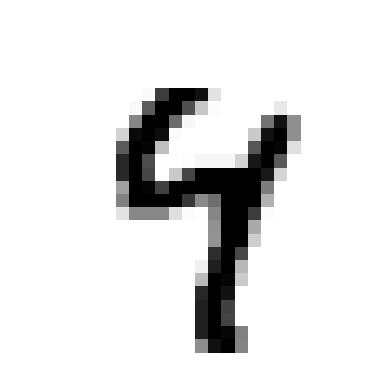

4

In [13]:
plt.imshow(X_train[2], cmap='binary')
plt.axis("off")
plt.show()
y_train[2]

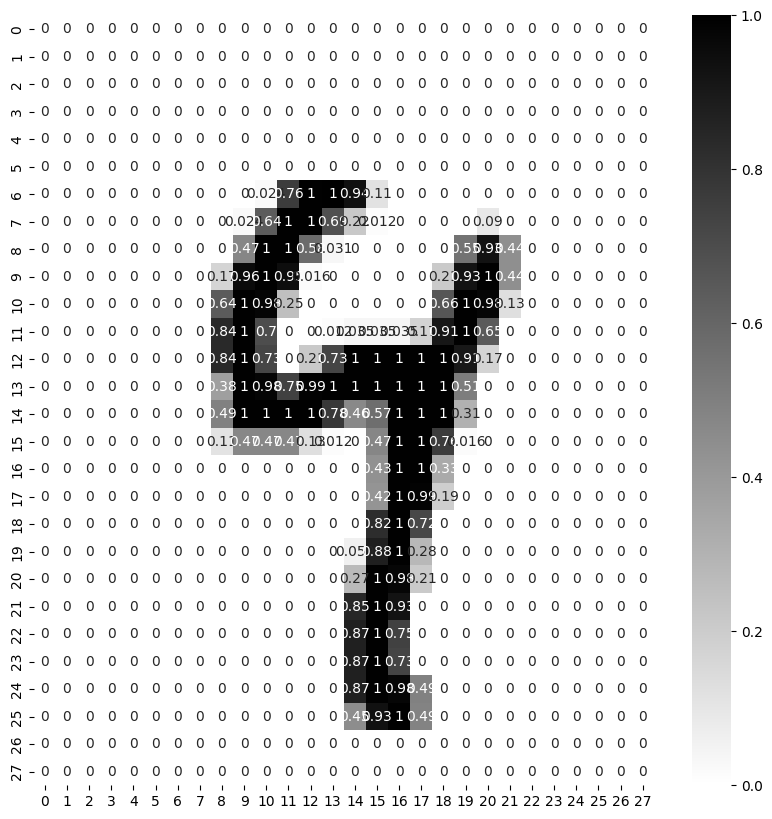

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[2], annot=True, cmap="binary")
plt.show()

In [19]:
from keras.layers.attention.multi_head_attention import activation
layers = [
    tf.keras.layers.Flatten(input_shape=[28,28], name = "inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name = "hiddenlayer1"),
    tf.keras.layers.Dense(100,activation= "relu", name = "hiddenlayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name = "outputLayer"),
]

In [20]:
model = tf.keras.models.Sequential(layers)

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[ 0.03952193,  0.03205301, -0.0571833 , ..., -0.04269702,
         0.02610826, -0.05758761],
       [ 0.05496548, -0.01975204,  0.07168557, ...,  0.0004041 ,
        -0.06209503,  0.01788786],
       [-0.0667148 , -0.03821764, -0.06122318, ...,  0.05272765,
         0.00566057, -0.04884421],
       ...,
       [ 0.02047848, -0.03092733, -0.00575671, ...,  0.07169332,
        -0.067371  , -0.05460994],
       [ 0.0427179 , -0.02924413,  0.06912608, ..., -0.04730895,
         0.04207261,  0.06405792],
       [ 0.00614118, -0.01222154,  0.01022043, ..., -0.07358155,
        -0.03080244,  0.0224677 ]], dtype=float32)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
weights.shape

(784, 300)

In [30]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

1.   List item
2.   List item



In [31]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [32]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

### Important -

* **Epochs**: Integer.
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

* **batch_size**: Integer or None.
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32.
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None.

    Number of samples per validation batch.
    
    If unspecified, will default to batch_size.
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [33]:
EPOCHS = 20
val_set = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=val_set
                    )

Epoch 1/20
1719/1719 [==============================] - 13s 3ms/step - loss: 0.5969 - accuracy: 0.8489 - val_loss: 0.3042 - val_accuracy: 0.9146
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2848 - accuracy: 0.9181 - val_loss: 0.2411 - val_accuracy: 0.9344
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2330 - accuracy: 0.9336 - val_loss: 0.2069 - val_accuracy: 0.9418
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1989 - accuracy: 0.9433 - val_loss: 0.1767 - val_accuracy: 0.9508
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1737 - accuracy: 0.9501 - val_loss: 0.1594 - val_accuracy: 0.9554
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1541 - accuracy: 0.9567 - val_loss: 0.1451 - val_accuracy: 0.9590
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1383 - accuracy: 0.9611 - val_loss: 0.1334 - val_accuracy

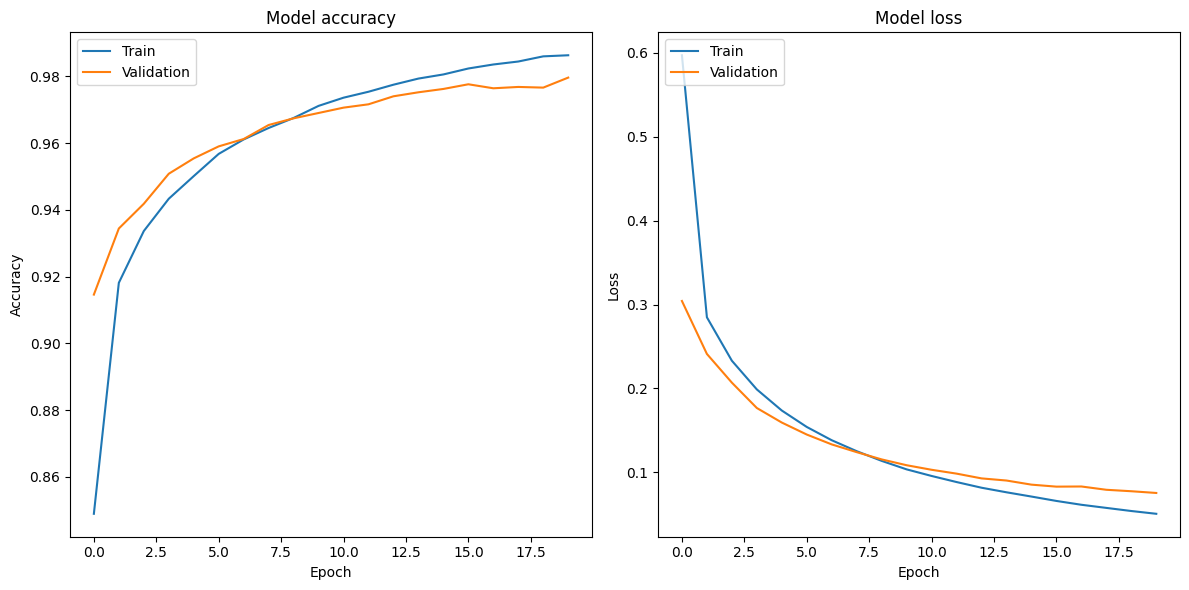

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9755


[0.08005066961050034, 0.9754999876022339]

In [36]:
model.save("model.h3")

In [37]:
saved_model = tf.keras.models.load_model("model.h3")

In [38]:
saved_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9755


[0.08005066961050034, 0.9754999876022339]

In [42]:
history_df = pd.DataFrame(history.history)
history_df.to_csv("train_history.csv", index=False)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.596868,0.848945,0.304190,0.9146
1,0.284756,0.918127,0.241110,0.9344
2,0.233035,0.933636,0.206931,0.9418
3,0.198853,0.943309,0.176714,0.9508
4,0.173720,0.950091,0.159387,0.9554
5,0.154147,0.956745,0.145107,0.9590
6,0.138321,0.961073,0.133359,0.9612
7,0.125284,0.964509,0.124135,0.9654
8,0.113740,0.967509,0.115492,0.9674
9,0.103623,0.971127,0.108555,0.9690


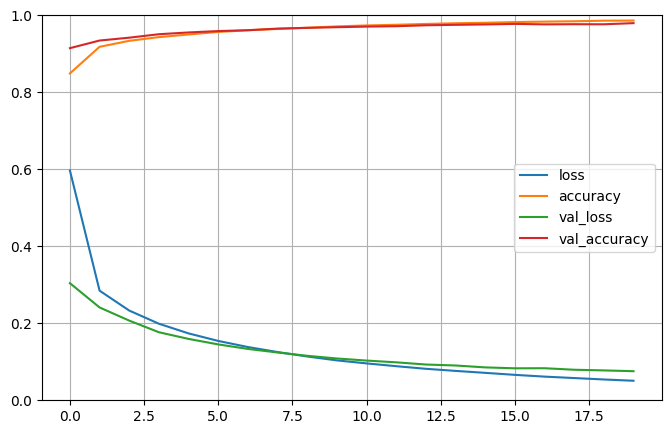

In [44]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 82ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

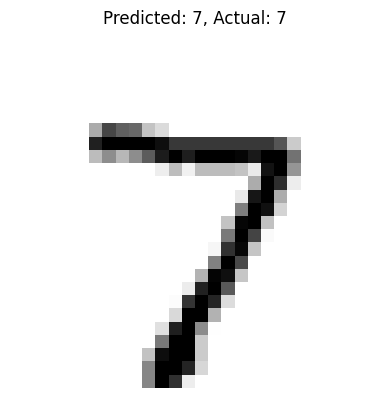

------------------------------------------------------------


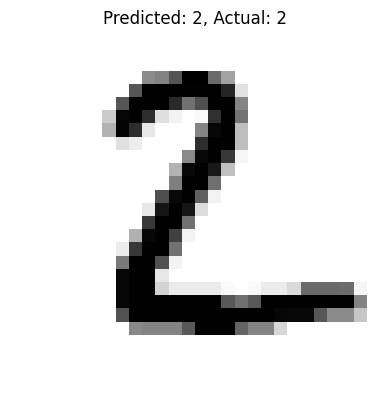

------------------------------------------------------------


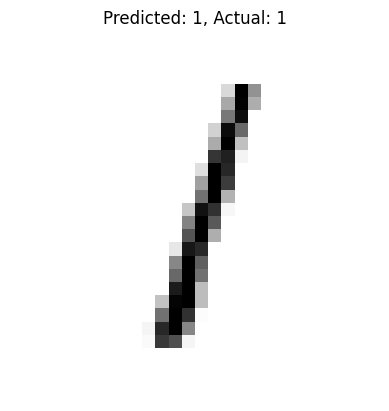

------------------------------------------------------------


In [47]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)